<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#US-Data" data-toc-modified-id="US-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>US Data</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Fit-and-Predict" data-toc-modified-id="Fit-and-Predict-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit and Predict</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Commentary</a></span><ul class="toc-item"><li><span><a href="#23rd-Apr" data-toc-modified-id="23rd-Apr-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>23rd Apr</a></span></li></ul></li></ul></div>

## US Data

## Load data

In [1]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Get our Country model data
country = 'US'
filepath = '../data/raw/'

us = CovidCountry(country=country,
                  filepath=filepath)
us.load()

## Fit and Predict

In [2]:
us.fit(curve='gamma')
us_df = us.predict()
us.save(filepath='../data/processed/')

In [3]:
# Show small window of prediction and actual
us_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-05-17,18937.0,14927.821466
2020-05-18,21551.0,14230.000588
2020-05-19,NaN,13550.961793
2020-05-20,NaN,12891.485253
2020-05-21,NaN,12252.199323


## Display Actual vs Prediction

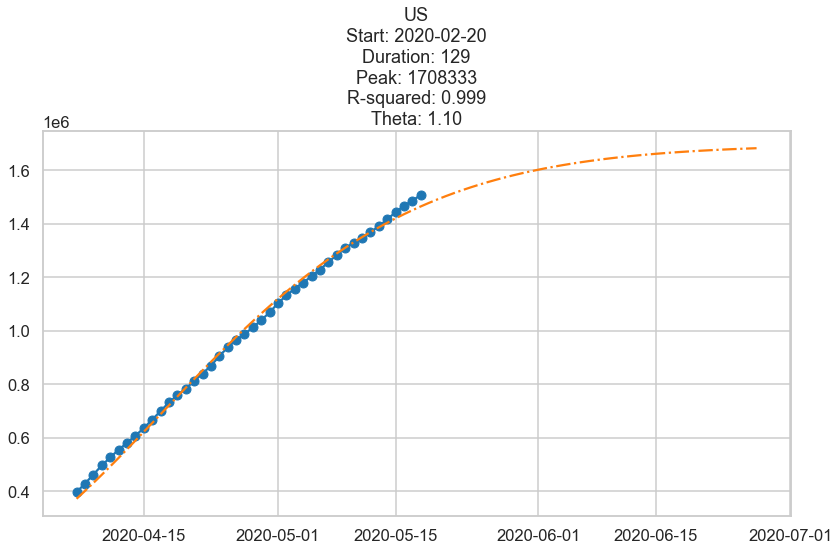

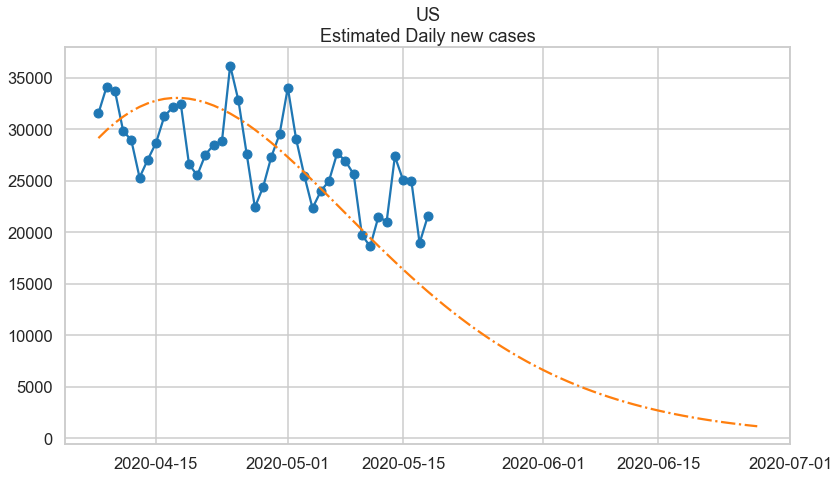

In [4]:
us.display(offset=42)

## Commentary
### 10th May
Increased duration - descent curve is very flat.

### 4th May
The descent slope is much less steep - update the model grid search and increase duration and total cases. It is likely this will need to increase again as the theta is still less than Italy, and I suspect US might have a bigger theta/less steep slope.

### 28th Apr
Model change - duration guess to 115 days, peak guess to 1.3m. Depending on how steep the descent slope becomes, it may need another tweak: Most countries with a large outbreak which was then slowed with lock down, tend to have a very long descent. In which case, there is more duration to add here.

### 23rd Apr
It is possible the US has a very long descent slope. That would fit the scenario where most states have an outbreak, but delayed significantly compared to New York. The UK is a good example of that where our skewed curve is made up of a sum of symetric curves from different locations. The biggest locations are the most likely to be dense, so they peak first, and peak highest. Followed by other regions which are delayed and lower - and that is what creates the steep climb (it is just one location - the largest) and the slow descent (as one small location peaks, a smaller one follows behind and peaks lower).